In [1]:
import nltk
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word'] = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last'] = len(st) - ix
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric'] = st[ix].isdigit()
    return d_ft

In [5]:
def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [6]:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal')

In [7]:
def ext_ft(tg_sent):
    sent, tag = [], []
    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg),index))
            tag.append(tg[index][1])
    return sent, tag
X,y = ext_ft(tagged_sentences)

In [55]:
n_sample = 4000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled = y[0:n_sample]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=1)

In [57]:
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4)

In [58]:
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)

In [59]:
test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('This', 'DET')
('is', 'VERB')
('a', 'DET')
('simple', 'ADJ')
('POS', 'NOUN')
('tagger', 'NOUN')


In [60]:
predictions = rf.predict(X_test)

In [61]:
accuracy_score(y_test,predictions)

0.91

In [62]:
conf_matrix = confusion_matrix(y_test,predictions)

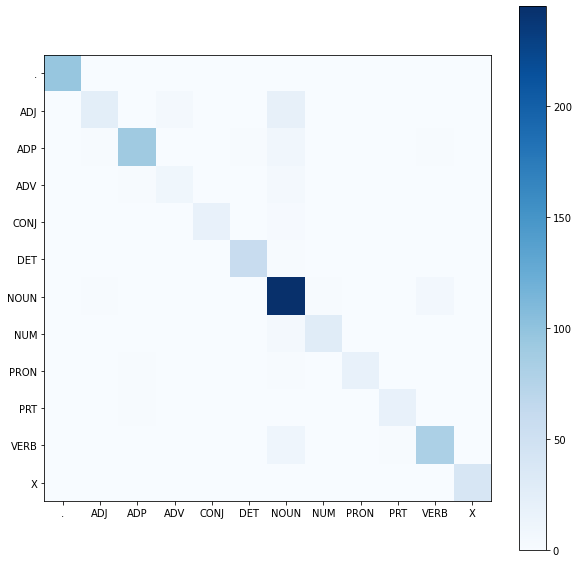

In [63]:
plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [64]:
feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
print(sorted_features[0:20])

[('dist_from_last', 0.016475929453850558), ('capitalized', 0.016462393865514968), ('prefix1=*', 0.014613531947979739), ('suffix2=ed', 0.013862922282455637), ('suffix2=he', 0.011661475965111676), ('suffix1=d', 0.011377350203585617), ('word=the', 0.010992752381792046), ('prefix3=the', 0.010925668695243855), ('prefix1=,', 0.010477048728944015), ('dist_from_first', 0.010130392106582621), ('prefix2=th', 0.009717717723642817), ('word=,', 0.008788921738248662), ('suffix2=,', 0.008679687334692597), ('numeric', 0.008345788088973202), ('suffix1=s', 0.007598435045879818), ('suffix3=the', 0.007524633985698277), ('suffix1=,', 0.0074747783502617645), ('prefix2=,', 0.007391371648939899), ('prefix2=to', 0.006778394267550995), ('suffix1=f', 0.006761741315976549)]
